<a href="https://colab.research.google.com/github/ganadaralabs/ComputerVision_Colab/blob/main/4%EA%B0%95_%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>**Colab Computer Vision Lecture 04** created by [Jooyeon Lee](http://leejooyeon.com/) | Check out other colab lectures on [GITHUB](https://github.com/ganadaralabs/ComputerVision_Colab)


##01 히스토그램 (Histogram)

**히스토그램**은 이미지의 픽셀 값 분포를 그래프 형태로 표현
- 전체 이미지에서 픽셀들의 색상이나 명암 분포를 파악하기 위해 사용함




```
cv2.calcHist(images, chennels, mask, histSize, ranges)
```
Parameters:
- images - 히스토그램을 구하고 싶은 이미지: *리스트 [image]로 감싸야 함*
- chennels - 히스토그램을 구하고 싶은 채널 인덱스
  - e.g. 그레이스케일 이미지(1채널): [0]
  - e.g. 컬러 이미지(3채널): [0,1,2]
- mask - 마스크 이미지에 포함된 영역만 히스토그램 계산
  - 마스크를 사용하지 않을 경우: None
- histSize - 히스토그램을 구성할 빈(bin)의 갯수 
  - e.g. 그레이스케일 이미지(1채널): [256]
  - e.g. 컬러 이미지(3채널): [35,35,35]
- ranges - 각 픽셀이 가질 수 있는 값의 범위 
  - e.g. RGB: [0,256]
  - e.g. HSV: [0,180, 0,256]


In [26]:
#구글 드라이브 마운트 하기
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


**01.1 그레이스케일 1D 히스토그램 구하기**

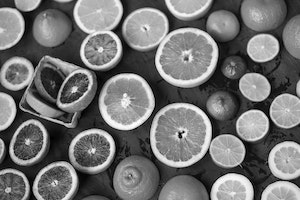

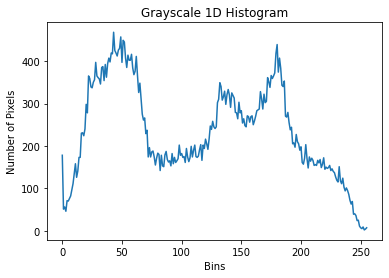

image.shape: (200, 300)
hist.shape: (256, 1)
hist.sum(): 60000.0
hist.max(): 468.0  hist.min(): 2.0


In [27]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 
import matplotlib.pylab as plt

grayImage = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/fruits300x200.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(grayImage)

#히스토그램 계산 및 그리기
#cv2.calcHist(images, chennels, mask, histSize, ranges)
hist = cv2.calcHist([grayImage], [0], None, [256], [0,256])

plt.title("Grayscale 1D Histogram")
plt.xlabel("Bins")
plt.ylabel("Number of Pixels")
plt.plot(hist)
plt.show()


#이미지와 히스토그램의 shape
print("image.shape:",grayImage.shape)
print("hist.shape:", hist.shape)
#히스토그램의 총 픽셀 수(합계)와 하나의 빈에 포함된 최소/최대 픽셀 갯수
print("hist.sum():", hist.sum()) 
print("hist.max():",hist.max()," hist.min():",hist.min())


**01.2 이미지의 마스킹된 영역의 1D 히스토그램 구하기**

=========grayImage=========
image.shape: (200, 300)
hist.shape: (256, 1)  hist.sum(): 60000.0  hist.max(): 1817.0  hist.min(): 0.0
=========maskedImage=========
image.shape: (200, 300)
hist.shape: (256, 1)  hist.sum(): 24000.0  hist.max(): 1474.0  hist.min(): 0.0




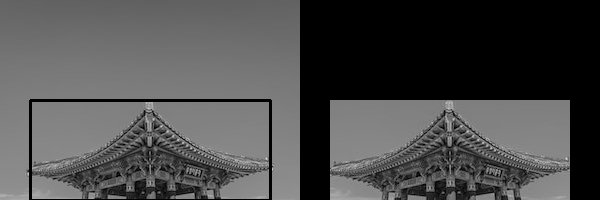

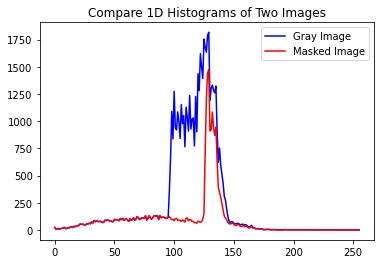

In [28]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 
import matplotlib.pylab as plt

grayImage = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/building300x200.jpg', cv2.IMREAD_GRAYSCALE)

#마스킹 할 ROI 위치
(x,y,w,h) = 30,100,240,100

#mask생성
mask = np.zeros(grayImage.shape[:2],np.uint8)
mask[y:y+h,x:x+w]=255
maskedImage = cv2.bitwise_and(grayImage,grayImage,mask=mask)

#그레이스케일 이미지의 히스토그램
grayImageHist = cv2.calcHist([grayImage],[0],None,[256],[0,256])
#mask를 적용한 히스트로그램
maskedHist = cv2.calcHist([grayImage],[0],mask,[256],[0,256])

print("=========grayImage=========")
print("image.shape:",grayImage.shape)
print("hist.shape:",grayImageHist.shape," hist.sum():",grayImageHist.sum()," hist.max():",grayImageHist.max()," hist.min():",grayImageHist.min())
print("=========maskedImage=========")
print("image.shape:",maskedImage.shape)
print("hist.shape:",maskedHist.shape," hist.sum():",maskedHist.sum()," hist.max():",maskedHist.max()," hist.min():",maskedHist.min())
print("\n")

#이미지에 ROI 위치 표시
if w > 0 and h > 0:
  cv2.rectangle(grayImage,(x,y),(x+w,y+h),(0,0,0), 2)

image_frame = cv2.hconcat([grayImage,maskedImage])
cv2_imshow(image_frame)

# red는 원본이미지 히스토그램, blue는 mask적용된 히스토그램
plt.title("Compare 1D Histograms of Two Images")
plt.plot(grayImageHist,color='b',label='Gray Image')
plt.plot(maskedHist,color='r',label='Masked Image')

plt.legend()
plt.show()

**01.3 두 이미지의 그레이스케일 1D 히스토그램 비교하기**

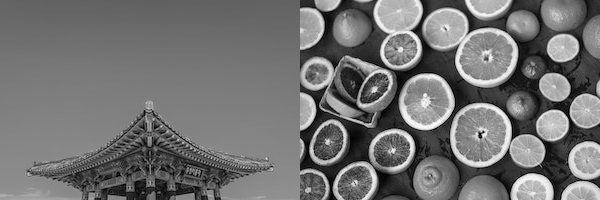

=========Image1=========
image.shape: (200, 300)
hist.shape: (256, 1)  hist.sum(): 60000.0  hist.max(): 1817.0  hist.min(): 0.0
=========Image2=========
image.shape: (200, 300)
hist.shape: (256, 1)  hist.sum(): 60000.0  hist.max(): 468.0  hist.min(): 2.0




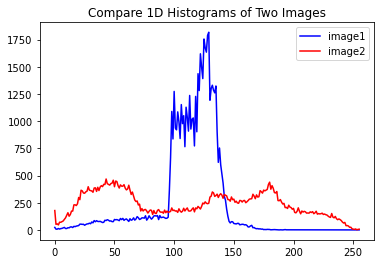

In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

grayImage1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/building300x200.jpg', cv2.IMREAD_GRAYSCALE)
grayImage2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/fruits300x200.jpg', cv2.IMREAD_GRAYSCALE)

image_frame = cv2.hconcat([grayImage1,grayImage2])
cv2_imshow(image_frame)

#cv2.calcHist(images, chennels, mask, histSize, ranges)
hist1 = cv2.calcHist([grayImage1],[0],None,[256],[0,256])
hist2 = cv2.calcHist([grayImage2],[0],None,[256],[0,256])

print("=========Image1=========")
print("image.shape:",grayImage1.shape)
print("hist.shape:",hist1.shape," hist.sum():",hist1.sum()," hist.max():",hist1.max()," hist.min():",hist1.min())

print("=========Image2=========")
print("image.shape:",grayImage2.shape)
print("hist.shape:",hist2.shape," hist.sum():",hist2.sum()," hist.max():",hist2.max()," hist.min():",hist2.min())
print("\n")

plt.title("Compare 1D Histograms of Two Images")
plt.plot(hist1,color='b',label='image1')
plt.plot(hist2,color='r',label='image2')

plt.legend()
plt.show()

**01.4 RGB 컬러이미지 1D 히스토그램 구하기**

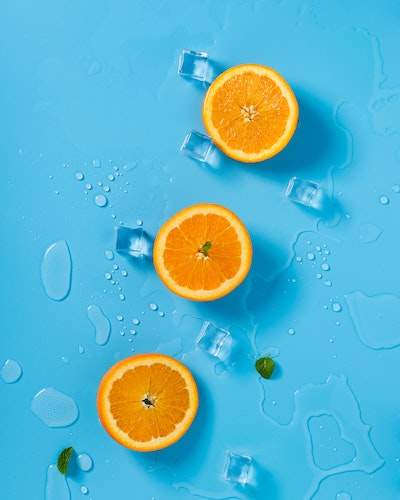

colorImage.shape: (500, 400, 3)
b channel] hist.shape: (256, 1)  hist.sum(): 200000.0  hist.max(): 15166.0  hist.min(): 35.0
g channel] hist.shape: (256, 1)  hist.sum(): 200000.0  hist.max(): 13088.0  hist.min(): 0.0
r channel] hist.shape: (256, 1)  hist.sum(): 200000.0  hist.max(): 5803.0  hist.min(): 18.0


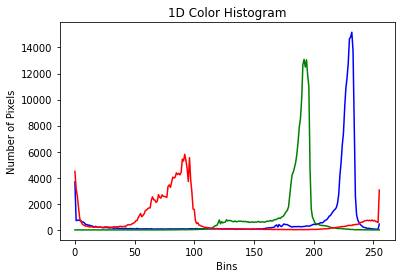

In [30]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 
import matplotlib.pylab as plt

colorImage = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/orange400x500.jpg')
cv2_imshow(colorImage)
print("colorImage.shape:",colorImage.shape)

#히스토그램 계산 및 그리기
#b,g,r = cv2.split(colorImage)와 동일
channels = cv2.split(colorImage) 
colors = ('b','g','r') #matplotlib 그래프 색상 명시

plt.title("1D Color Histogram")
plt.xlabel("Bins")
plt.ylabel("Number of Pixels")

for (channel, color) in zip (channels, colors):
    #cv2.calcHist(images, chennels, mask, histSize, ranges)
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    print(color,"channel] hist.shape:",hist.shape," hist.sum():",hist.sum()," hist.max():",hist.max()," hist.min():",hist.min())
plt.show()

**01.5 RGB 컬러이미지 2D 히스토그램 구하기**
- RGB 이미지의 3개의 채널을 2차원으로 표현하면 2채널씩 비교할 수 있어서 총 3개의 2D 히스토그램으로 나타낼 수 있다.
- 다차원 히스토그램을 그릴 때 빈(bin) 갯수를 256이 아닌 8-64개 정도로 줄여서 표현한다.
  - 2D 히스토그램에 256개의 빈(bin)을 사용하면 256x256=65,536개의 픽셀을 따로 세어 표현하기 때문에 연산 속도가 느리다. 

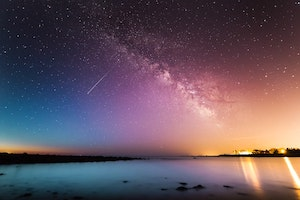

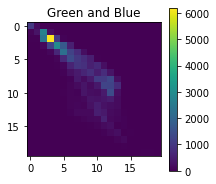

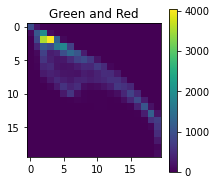

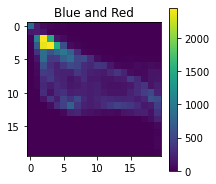

In [31]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 
import matplotlib.pylab as plt

colorImage = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/nightsky300x200.jpg')
cv2_imshow(colorImage)



#임의로 정한 빈의 갯수
binSize = 20

#픽셀의 초록색과 파란색 값에 따른 분포
plt.figure(figsize=(3,3))
plt.title("Green and Blue")
hist = cv2.calcHist([colorImage], [1, 0], None, [binSize,binSize], [0, 256, 0, 256])
p = plt.imshow(hist, interpolation = "nearest")
plt.colorbar(p)

#픽셀의 초록색과 빨간색 값에 따른 분포
plt.figure(figsize=(3,3))
plt.title("Green and Red")
hist = cv2.calcHist([colorImage], [1, 2], None, [binSize,binSize], [0, 256, 0, 256])
p = plt.imshow(hist, interpolation = "nearest")
plt.colorbar(p)

#픽셀의 파란색과 빨간색 값에 따른 분포
plt.figure(figsize=(3,3))
plt.title("Blue and Red")
hist = cv2.calcHist([colorImage], [0, 2], None, [binSize,binSize], [0, 256, 0, 256])
p = plt.imshow(hist, interpolation = "nearest") 
plt.colorbar(p)

plt.show()

**01.6 RGB 컬러이미지 3D 히스토그램 구하기**

- Matplotlib의 [mplot3d Toolkit](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)을 사용해 3D 그래프도 표현 가능


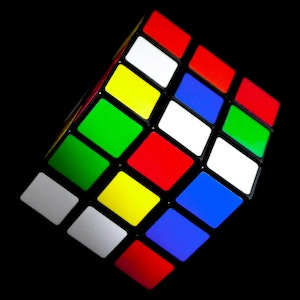

Max: 48468.0 , Min: 0.0
Plot Circle Size Ratio: 0.02063216967896344


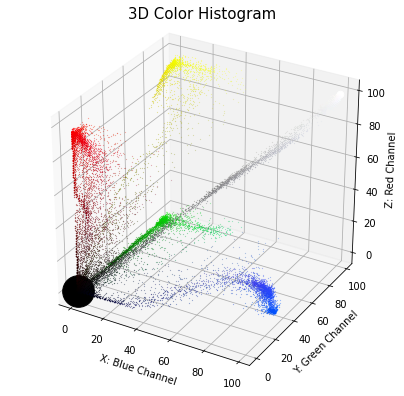

In [32]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 
import matplotlib.pylab as plt
#from mpl_toolkits.mplot3d import Axes3D

colorImage = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/cube300x300.jpg')
cv2_imshow(colorImage)

#임의로 정한 RGB 색상 빈의 갯수 
binSize = 100

hist3D = cv2.calcHist([colorImage], [0, 1, 2], None, [binSize, binSize, binSize], [0, 256, 0, 256, 0, 256])
#가장 많은 픽셀을 포함 한 3D히스토그램의 빈의 픽셀 갯수와 최소 픽셀 갯수
print("Max:",np.max(hist3D),", Min:",np.min(hist3D))
#가장 큰 빈을 scatter plot으로 표현할 원의 최대 크기
circleMax = 1000
ratio = circleMax / np.max(hist3D)
print("Plot Circle Size Ratio:",ratio)


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection="3d")
for (bCount, plane) in enumerate(hist3D):
  for (gCount, row) in enumerate(plane):
    for (rCount, col) in enumerate(row):
      if hist3D[bCount][gCount][rCount] > 0.0:
        size = ratio * hist3D[bCount][gCount][rCount]
        rgb = (rCount/(binSize-1), gCount/(binSize-1), bCount/(binSize-1))
        ax.scatter(bCount, gCount, rCount, s = size, facecolors = rgb)
    
plt.title("3D Color Histogram",fontsize=15,pad=20,ha='center')
ax.set_xlabel('X: Blue Channel')
ax.set_ylabel('Y: Green Channel')
ax.set_zlabel('Z: Red Channel')
plt.show()

#02 히스토그램을 사용해 이미지의 화질을 개선하거나 이미지를 분류하는 방법
1. 히스토그램의 노멀라이즈 (Normalize, 정규화)
2. 히스토그램의 이퀄라이즈 (Equalize, 평탄화)
3. 히스토그램의 CLAHE(Contrast Limiting Adaptive Histogram Equalization)
4. 히스토그램 역투영(Backprojection)
5. 히스토그램 유사도 비교

**02.1 히스토그램의 노멀라이즈(Normalize,정규화)**


**노멀라이즈(Normalize,정규화)**: 기준이 서로 다른 데이터 범위를 0-1로 맞춰 데이터 분포를 특정 구간으로 바꾸는 기법

<br>

$$
X_{normalized} = \frac{X-X_{min}}{X_{max}-X_{min}} \times({R_{upper}-R_{lower})} + R_{lower}
$$

<br>

- 보통 데이터를 노멀라이즈/정규화 하는 경우는 서로 다른 기준을 비슷하게 맞춰 비교하는 경우에 필요
  - 예) *예전 토익 점수 600점(총점990점)과 뉴토익 점수 550점(총점600점)을 비교할 때*
  - 예) *10명의 학생들의 점수 분포가 [90,91,93,95,99,101,101,103,105,105]일 때 성적을 결정하기 위해 70-100 범위로 점수를 다시 환산할 때*
- 이미지에서 정규화가 필요한 경우
  - 픽셀의 분포가 한 곳에 집중되어 몰려 있는 경우 화질을 개선하기 위해 노멀라이즈 적용 
  - 이미지 간의 연산 시 서로 조건이 다른 경우 같은 조건으로 만들기 위해 노멀라이즈 적용 
- 픽셀의 분포를 늘려서(stretching) 이미지의 명암(contrast,색채대비)을 개선
  - 한 곳에 집중된 영역과 멀리 떨어진 값이 있을 경우에는 노말라이즈는 효과가 없음

```
cv2.normalize(srcImage, dstImage, alpha, beta, norm_type, mask)
```

Parameters:	
- srcImage – 사용할 이미지 데이터
- dstImage – srcImage와 같은 크기의 노멀라이즈 이후 이미지 데이터
- alpha – 구간 노멀라이즈 범위의 아래 경계값
- beta – 구간 노멀라이즈 범위의 윗 경계값
- normType – 노말라이즈 알고리즘 옵션
  - NORM_MINMAX - alpha와 beta 구간으로 노멀라이즈
  - NORM_INF - 최대값으로 나누기
  - NORM_L1 - 전체 합으로 나누기, alpha가 노멀라이즈 전체 합
  - NORM_L2 - 단위 벡터로 노멀라이즈
- mask – 마스크 (옵션)

In [33]:
#구글 드라이브 마운트 하기
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


=========Original Gray Image=========
Min: 73 Max: 200 Mean: 110.74395
=========OpenCV Normalized Image=========
Min: 0 Max: 255 Mean: 75.6879
=========Manually Normalized Image=========
Min: 0 Max: 255 Mean: 75.48791666666666




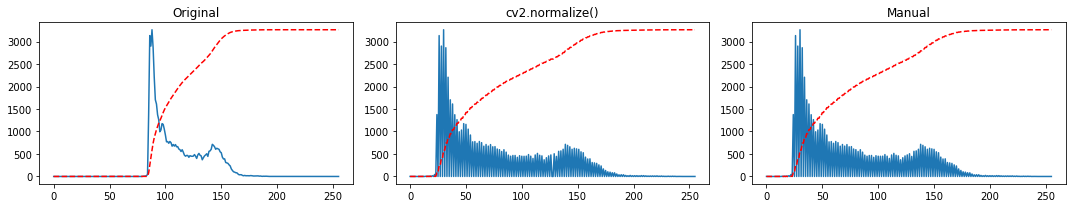

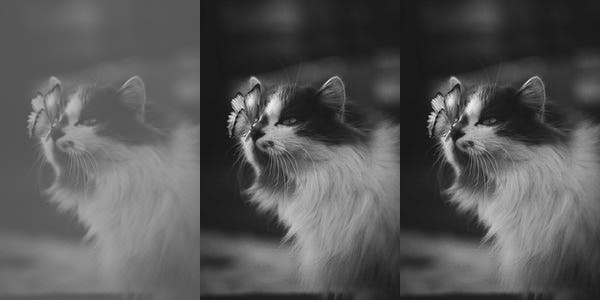

In [34]:
import cv2
from google.colab.patches import cv2_imshow 
import numpy as np
import matplotlib.pylab as plt

grayImage = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/catImages/cat200x300_lowExposure.jpg',cv2.IMREAD_GRAYSCALE)

print("=========Original Gray Image=========")
print("Min:",grayImage.min(),"Max:",grayImage.max(),"Mean:",grayImage.mean())

#OpenCV를 이용해 연산한 정규화 이미지
cvNormalized = cv2.normalize(grayImage, None, 0, 255, cv2.NORM_MINMAX)
print("=========OpenCV Normalized Image=========")
print("Min:",cvNormalized.min(),"Max:",cvNormalized.max(),"Mean:",cvNormalized.mean())


#직접 연산한 정규화 이미지
image = grayImage.astype(np.float32)
manNormalized = ((image-image.min())/(image.max()-image.min()))*(255) 
manNormalized = manNormalized.astype(np.uint8)
print("=========Manually Normalized Image=========")
print("Min:",manNormalized.min(),"Max:",manNormalized.max(),"Mean:",manNormalized.mean())
print("\n")

#각각 히스토그램 계산
#cv2.calcHist(images, chennels, mask, histSize, ranges)
hist = cv2.calcHist([grayImage], [0], None, [256], [0, 255])
cvNormalizedHist = cv2.calcHist([cvNormalized], [0], None, [256], [0, 255])
manNormalizedHist = cv2.calcHist([manNormalized], [0], None, [256], [0, 255])


hists = {'Original': hist,'cv2.normalize()':cvNormalizedHist,'Manual':manNormalizedHist,}

fig=plt.figure(figsize=(15,3))
for i, (title, hist) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(title)
    plt.plot(hist)
    normalizedCDF = np.cumsum(hist)/hist.sum()*hist.max()
    plt.plot(normalizedCDF,'r--')
plt.tight_layout()
plt.show()


print("\n")
image_frame = cv2.hconcat([grayImage,cvNormalized,manNormalized])
cv2_imshow(image_frame)

**02.2 그레이스케일 이미지의 이퀄라이즈(Equalize, 평탄화)**

이퀄라이즈/평탄화는 각각의 값이 전체 분포에 차지하는 비중에 따라 분포를 재분배해서 명암 대비를 개선하는 데 효과적이다.

<br>

$$
X_{equalized} = \frac{cdf-cdf_{min}}{cdf_{max}-cdf_{min}} \times({R_{upper}-1)} 
$$

<br>

Histogram equalization is a technique for adjusting image intensities to enhance contrast.
- 픽셀의 분포를 늘려서(stretching) 이미지의 **명암(contrast,색채대비)**을 개선
  - 각각의 값이 전체 분포에 차지하는 비중에 따라 분포를 재분배 하기 때문에 노멀라이즈보다 명암대비를 개선하는데 효과적
  - 히스토그램으로 빈도를 구해서 노멀라이즈 한 뒤 누적값을 전체 개수로 나누어 나온 결과 값을 원래 픽셀 값에 배정



- 보통 그레이스케일 이미지에 적용하지만 HSV, YUV등 컬러이미지에도 적용가능
- 전경과 배경이 둘 다 밝거나 어두울 때 도움이 됨
- 사진에서는 보통 비현실적인 효과가 나타나지만 의학이나 위성사진 등에 적용하면 명암개선 효과가 있음


CDF Max: 60000.0 CDF Min: 1.0


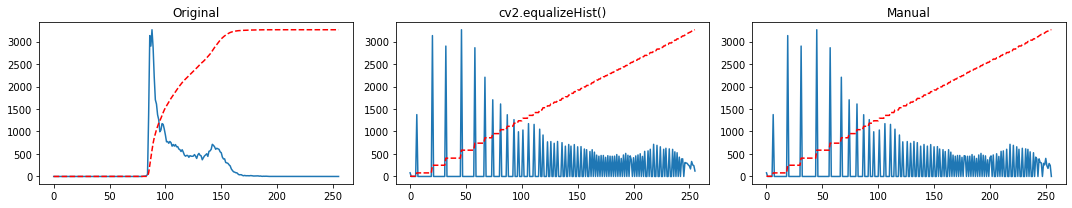

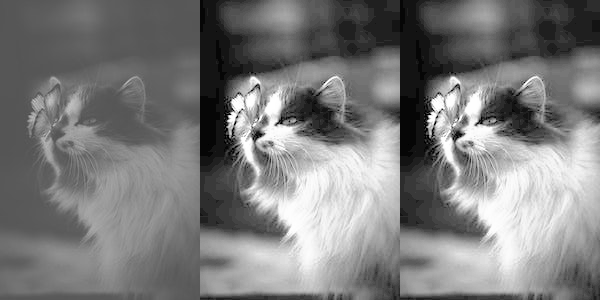

In [35]:
import cv2
from google.colab.patches import cv2_imshow 
import numpy as np
import matplotlib.pylab as plt

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/catImages/cat200x300_lowExposure.jpg', cv2.IMREAD_GRAYSCALE)


#OpenCV 이퀄라이즈 히스토그램 적용
cvEqImage = cv2.equalizeHist(image)

#원본 이미지 히스토그램 구하기
hist = cv2.calcHist([image], [0], None, [256], [0, 256])  #히스토그램 계산

#누적 히스토그램(Cumulative Distribution Function(CDF))
#hist.cumsum(): cumulative sum of array elements over a given axis)
CDF = hist.cumsum()   
#넘파이의 숫자마스크 기능 x의 값이 value의 값과 같으면 NaN으로 마스킹
#ma.masked_equal(x,value)                                     
maskedCDF = np.ma.masked_equal(CDF, 0) #0(zero)인 값을 NaN으로 제거  

print("CDF Max:",maskedCDF.max(),"CDF Min:",maskedCDF.min()) #0을 제외한 최소값 출력                
maskedCDF = (maskedCDF-maskedCDF.min())/(maskedCDF.max()-maskedCDF.min())*(256-1)   # 이퀄라이즈 히스토그램 계산
CDF = np.ma.filled(maskedCDF,0).astype('uint8') # NaN을 다시 0으로 변환
manEqImage = CDF[image] # 히스토그램을 픽셀로 맵핑


#이퀄라이즈 결과 히스토그램 계산
hist2 = cv2.calcHist([cvEqImage], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([manEqImage], [0], None, [256], [0, 256])

#결과 출력
fig=plt.figure(figsize=(15,3))
hists = {'Original':hist, 'cv2.equalizeHist()':hist2, 'Manual':hist3}
for i, (title, hist) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(title)
    plt.plot(hist)
    normalizedCDF = np.cumsum(hist)/hist.sum()*hist.max()
    plt.plot(normalizedCDF,'r--')
plt.tight_layout()
plt.show()

print("\n")
image_frame = cv2.hconcat([image,cvEqImage,manEqImage])
cv2_imshow(image_frame)

**02.3 컬러 이미지의 이퀄라이즈(Equalize, 평탄화)**
- RGB의 경우 3개의 채널을 다 적용해야하지만 HSV의 경우 Value(명도/밝기) 채널만 연산해 적용하면 편함

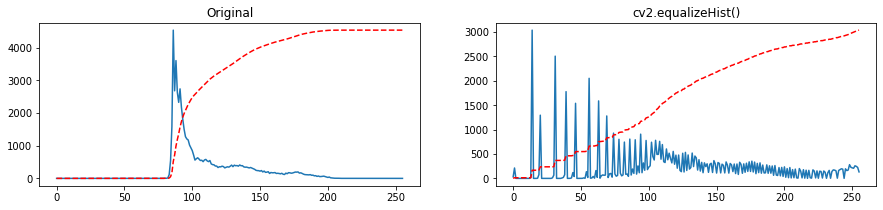

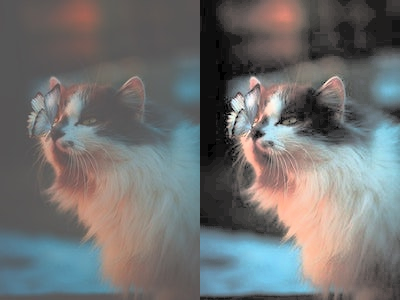

In [36]:
import cv2
from google.colab.patches import cv2_imshow 
import numpy as np
import matplotlib.pylab as plt

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/catImages/cat200x300_lowExposure.jpg')
hsvImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 

#HSV 컬러 스페이스 중 Value 체널 대해서 이퀄라이즈 적용
hsvImage[:,:,2] = cv2.equalizeHist(hsvImage[:,:,2]) 
#컬러 스케일을 HSV에서 BGR로 변경
eqImage = cv2.cvtColor(hsvImage, cv2.COLOR_HSV2BGR) 

#이퀄라이즈 결과 히스토그램 계산
hist1 = cv2.calcHist([image], [2], None, [256], [0, 256])
hist2 = cv2.calcHist([eqImage], [2], None, [256], [0, 256])

#결과 출력
hists = {'Original':hist1, 'cv2.equalizeHist()':hist2}
fig=plt.figure(figsize=(15,3))
for i, (title, hist) in enumerate(hists.items()):
    plt.subplot(1,2,i+1)
    plt.title(title)
    plt.plot( hist)
    normalizedCDF = np.cumsum(hist)/hist.sum()*hist.max()
    plt.plot(normalizedCDF,'r--')
plt.show()

print("")
image_frame = cv2.hconcat([image,eqImage])
cv2_imshow(image_frame)

**02.4 CLAHE(Contrast Limiting Adaptive Histogram Equalization)**
이미지 전체에 이퀄라이즈를 적용했을 때 너무 밝은 부분이 날아가는 현상을 막기 위해 이미지를 일정한 영역으로 나누어서 적용
- 잡영/노이즈가 증폭되는 것을 막기 위해 히스토그램 빈(bin)이 제한 값을 넘으면 다른 빈(bin)으로 배분 후 이퀄라이즈 적용
  ![img](https://www.researchgate.net/profile/Omar-Boudraa/publication/330701266/figure/fig4/AS:720261800280068@1548735203667/Contrast-Limited-Adaptive-Histogram-Equalization-CLAHE-and-Limited-Function.jpg)

![img](https://www.researchgate.net/profile/Nisar-Ahmed-31/publication/235641059/figure/fig1/AS:299652265070599@1448454075719/Application-of-contrast-enhancement-techniques-on-Digital-X-Ray-of-hand-and-Neck-and.png)


이미지 출처: 
[Digital Radiographic Image Enhancement for Improved Visualization](https://www.researchgate.net/publication/235641059_Digital_Radiographic_Image_Enhancement_for_Improved_Visualization)

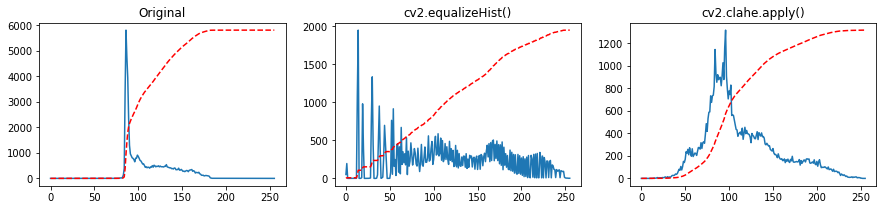

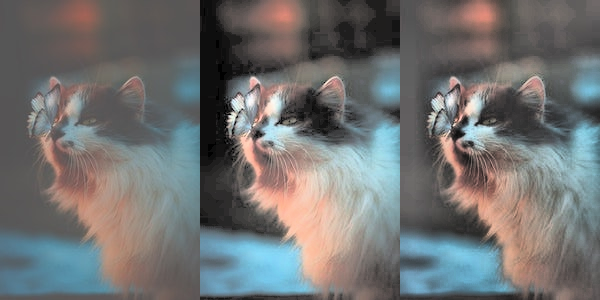

In [37]:
import cv2
from google.colab.patches import cv2_imshow 
import numpy as np
import matplotlib.pylab as plt

#HSV 이미지로 변경
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/catImages/cat200x300_lowExposure.jpg')
hsvImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#HSV 컬러 스페이스 중 Value 체널 대해서 이퀄라이즈 적용
eqImage = hsvImage.copy()
eqImage[:,:,2] = cv2.equalizeHist(eqImage[:,:,2])
eqImage = cv2.cvtColor(eqImage, cv2.COLOR_HSV2BGR)

#밝기 채널에 대해서 CLAHE 적용
claheImage = hsvImage.copy()
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))  #CLAHE 생성
claheImage [:,:,2] = clahe.apply(claheImage [:,:,2])        #CLAHE 적용
claheImage  = cv2.cvtColor(claheImage , cv2.COLOR_HSV2BGR)

#히스토그램 계산
hist1 = cv2.calcHist([image], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([eqImage], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([claheImage], [0], None, [256], [0, 256])

#결과 출력
hists = {'Original':hist1,'cv2.equalizeHist()':hist2,'cv2.clahe.apply()':hist3}
fig=plt.figure(figsize=(15,3))
for i, (title,hist) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(title)
    plt.plot(hist)
    normalizedCDF = np.cumsum(hist)/hist.sum()*hist.max()
    plt.plot(normalizedCDF,'r--')
plt.show()


print("")
image_frame = cv2.hconcat([image,eqImage,claheImage])
cv2_imshow(image_frame)

**02.5 히스토그램 역투영(Backprojection)**
- Michael J. Swain과 Dana H. Ballard이 [Indexing via Color Histograms](https://www.semanticscholar.org/paper/Indexing-via-color-histograms-Swain-Ballard/c8fba07ecbebefbb15df557e479f778de05b6c4d)논문에서 발표
- 객체의 형태가 아닌 색상으로 이미지 속 ROI 객체를 찾는 이미지 분류(image segmentation)용으로 사용가능


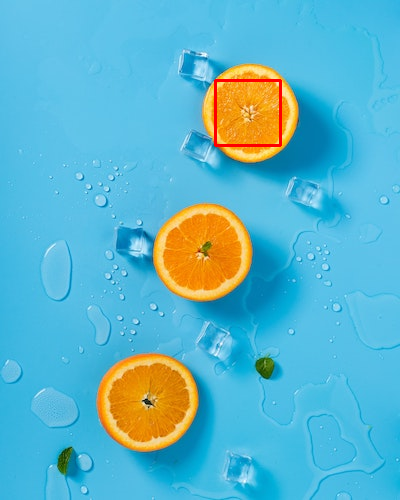

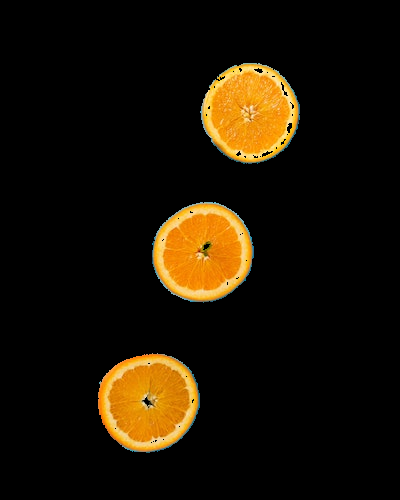

In [38]:
import cv2
from google.colab.patches import cv2_imshow 
import numpy as np
import matplotlib.pylab as plt

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/orange400x500.jpg')
hsvImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
draw = image.copy()

# 역투영된 결과를 마스킹해서 결과를 출력하는 함수
def masking(bp):
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    cv2.filter2D(bp,-1,disc,bp)
    _, mask = cv2.threshold(bp, 1, 255, cv2.THRESH_BINARY)
    result = cv2.bitwise_and(image, image, mask=mask)
    cv2_imshow(result)

# cv2.calcBackProject() 역투영 함수 사용
def backProject_cv(hist_roi):
    #역투영 함수 호출
    bp = cv2.calcBackProject([hsvImage], [0, 1], hist_roi,  [0, 180, 0, 256], 1)
    #역 투영 결과로 마스킹해서 결과 출력
    masking(bp)

#직접 구현한 역투영 함수
def backProject_manual(hist_roi):
    #전체 영상에 대한 H,S 히스토그램 계산
    hist_img = cv2.calcHist([hsvImage], [0,1], None,[180,256], [0,180,0,256])
    #선택영역과 전체 영상에 대한 히스토그램 그램 비율계산
    hist_rate = hist_roi/ (hist_img + 1)
    #비율에 맞는 픽셀 값 매핑
    h,s,v = cv2.split(hsvImage)
    bp = hist_rate[h.ravel(), s.ravel()]
    #비율은 1을 넘어서는 안되기 때문에 1을 넘는 수는 1을 갖게 함
    bp = np.minimum(bp, 1)
    #1차원 배열을 원래의 shape로 변환
    bp = bp.reshape(hsvImage.shape[:2])
    cv2.normalize(bp,bp, 0, 255, cv2.NORM_MINMAX)
    bp = bp.astype(np.uint8)
    #역 투영 결과로 마스킹해서 결과 출력
    masking(bp)
 

# ROI 선택 후 히스토그램 역투영 결과로 마스킹
(x,y,w,h) = 215,80,65,65
if w > 0 and h > 0:
    roi = draw[y:y+h, x:x+w]
    # 빨간 사각형으로 ROI 영역 표시
    cv2.rectangle(draw, (x, y), (x+w, y+h), (0,0,255), 2)
    cv2_imshow(draw)
    #선택한 ROI를 HSV 컬러 스페이스로 변경
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    #H,S 채널에 대한 히스토그램 계산
    hist_roi = cv2.calcHist([hsv_roi],[0, 1], None, [180, 256], [0, 180, 0, 256] )
    #ROI의 히스토그램을 매뉴얼 구현함수와 OpenCV 이용하는 함수에 각각 전달
    backProject_cv(hist_roi)
    #backProject_manual(hist_roi)
    

**02.6 히스토그램의 유사도 비교**

두 이미지의 픽셀 값의 분포를 나타내는 히스토그램을 비교 후 픽셀 값의 분포가 서로 비슷하다면 유사한 이미지일 확률이 높음


```
cv2.compareHist(hist1, hist2, method)
```
parameters:
- hist1, hist2: 비교할 두 개의 히스토그램, 크기와 차원이 같아야 함
- method: 비교 알고리즘
  - **CV_COMP_CORREL**: Correlation/상관관계 (1: 완전 일치, -1: 완전 불일치, 0: 무관계)
  - **CV_COMP_CHISQR**: Chi-Square/카이제곱 (0: 완전 일치, 무한대: 완전 불일치)
  - **CV_COMP_INTERSECT**: Intersection/교차 (1: 완전 일치, 0: 완전 불일치(- 1로 정규화한 경우))
  - **CV_COMP_BHATTACHARYYA**: Bhattacharyya distance/바타차야 거리 (0: 완전일치, 1: 최대 불일치)



<br>

참고링크: 
- [Histogram Comparison](https://docs.opencv.org/3.4/d8/dc8/tutorial_histogram_comparison.html)


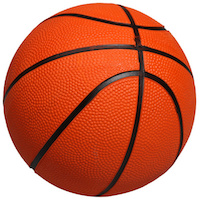

CORREL    	img1:   1.00	img2:   1.00	img3:   0.99	img4:   0.90	img5:   0.97	img6:   0.95	
CHISQR    	img1:   0.00	img2:   0.90	img3:   1.82	img4:  57.86	img5:   4.52	img6:   9.13	
INTERSECT 	img1:   1.00	img2:   0.81	img3:   0.80	img4:   0.21	img5:   0.22	img6:   0.23	
BHATTACHARYYA	img1:   0.00	img2:   0.26	img3:   0.28	img4:   0.80	img5:   0.86	img6:   0.87	


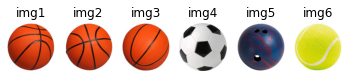

In [39]:
import cv2
from google.colab.patches import cv2_imshow 
import numpy as np
import matplotlib.pylab as plt

img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/ballImages/basketball1.jpg')
img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/ballImages/basketball2.jpg')
img3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/ballImages/basketball3.jpg')
img4 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/ballImages/soccerball.jpg')
img5 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/ballImages/bowlingball.jpg')
img6 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/ballImages/tennisball.jpg')

cv2_imshow(img1)
images = [img1, img2, img3, img4, img5, img6]

hists = []
for i, img in enumerate(images) :
    plt.subplot(1,len(images),i+1)
    plt.title('img%d'% (i+1))
    plt.axis('off') 
    plt.imshow(img[:,:,::-1])
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0,1], None, [180,256], [0,180,0, 256])
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)


query = hists[0]
methods = {'CORREL' :cv2.HISTCMP_CORREL, 
           'CHISQR':cv2.HISTCMP_CHISQR, 
           'INTERSECT':cv2.HISTCMP_INTERSECT,
           'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA}
           
for j, (name, flag) in enumerate(methods.items()):
    print('%-10s'%name, end='\t')
    for i, (hist, img) in enumerate(zip(hists, images)):
        #각각의 방법에 따른 image1과 다른 이미지들의 히스토그램 비교분석
        ret = cv2.compareHist(query, hist, flag)
        #교차 분석인 경우 비교대상으로 나누어 1로 정규화
        if flag == cv2.HISTCMP_INTERSECT: 
            ret = ret/np.sum(query)       
        print("img%d:%7.2f"% (i+1 , ret), end='\t')
    print()
plt.show()